In [20]:
import torch
from torch import nn 
from torch.utils.data import DataLoader, Dataset
from PIL import Image
from torchvision import transforms, models
import torch.nn.functional as F
import numpy as np
import os
import os.path as osp
import matplotlib.pyplot as plt

In [12]:
data_dir = 'rd-real-GAN-DM'

Current size of the sample images:
- DM: `512 x 512`
- GAN: `1024 x 1024`
- Real: `1024 x 1024`

Define test transform for image

In [13]:
test_image_transform = transforms.ToTensor()

### Visualize rich texture image and poor texture image

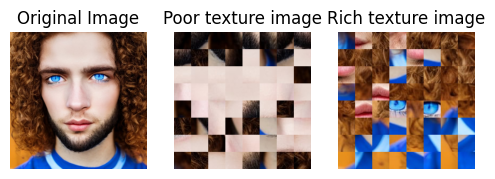

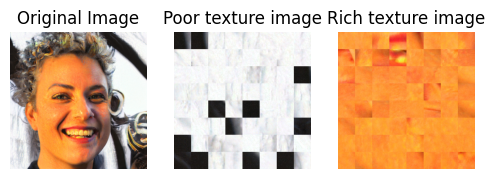

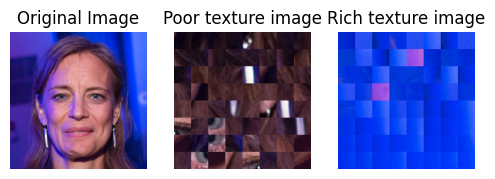

In [14]:
from utils import plot_rich_poor_patch, reconstruct_image_from_patches

imgs = ['dm_01.jpeg', 'gan_01.jpeg', 'real_01.jpeg']
for img in imgs:
    img_path = osp.join(data_dir, img)
    image = Image.open(img_path)
    image = test_image_transform(image)
    rich_image, poor_image = reconstruct_image_from_patches(image, 32)
    plot_rich_poor_patch(image, rich_image, poor_image)

### Visualize output after a high pass filter
Extract the noise pattern using a set of high-pass filters proposed in Spatial Rich Model

In [15]:
kernels = np.load('SRM_Kernels.npy')
kernels.shape

(5, 5, 1, 30)

In [16]:
import numpy as np
import torch

def convert_filters(filters_numpy):
    # Replicate the filter along the third dimension to create a (5, 5, 3, 30) array
    filters_replicated = np.tile(filters_numpy, (1, 1, 3, 1))

    # Convert NumPy array to PyTorch tensors
    filters_tensors = [torch.tensor(f, dtype=torch.float32).permute(2, 0, 1) for f in np.moveaxis(filters_replicated, -1, 0)]

    return torch.stack(filters_tensors)

# Convert filters
filters_tensors = convert_filters(kernels)
filters_tensors.size()


torch.Size([30, 3, 5, 5])

In [17]:
img = 'rd-real-GAN-DM/dm_01.jpeg'
img_tensor = test_image_transform(Image.open(img))

In [18]:
out = F.conv2d(img_tensor.unsqueeze(0), filters_tensors)

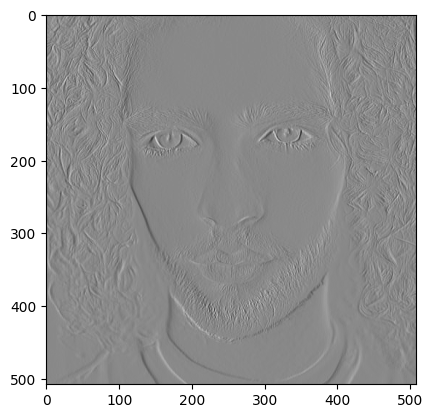

In [22]:
# for i in range(30):
import random
i = random.randint(0, 29)
plt.imshow(out[:, i].squeeze(0).numpy(), cmap='gray')